## Exploring violations related to farming activity

To run this notebook, load SDWIS csv data files into the folder ../../../data/sdwis/SDWIS

In [1]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

STATE_CODE = 'VT'

In [2]:
# Label data with full year, e.g., 2012 for 01-JUL-12, 1990 for 01-JUN-90
def get_full_year(ddmmmyy):
    full_year = 0
    date_parts = ddmmmyy.split('-')
    if len(date_parts) == 3:
        if (int(date_parts[2]) <= 19):
            full_year = int('20' + date_parts[2])
        else:
            full_year = int('19' + date_parts[2])
    return full_year

In [3]:
def get_full_year_for_row(row):
    return get_full_year(row['VIOLATION.COMPL_PER_BEGIN_DATE'])

In [4]:
# calculate years ago from input 'current_year'
def get_years_ago(row, current_year):
    row_year = get_full_year(row['VIOLATION.COMPL_PER_BEGIN_DATE'])
    return str(current_year - row_year) + '_yrs_ago'

In [5]:
def print_water_system_violations(water_system_df, viol_df):
    viol_df = viol_df.merge(water_system_df, left_on='VIOLATION.PWSID', right_on='WATER_SYSTEM.PWSID')
    print('# water systems: ' + str(water_system_df.shape[0]))
    print('# violations: ' + str(viol_df.shape[0]))
    print('# reporting violations: ' \
          + str(viol_df[viol_df['VIOLATION.VIOLATION_CATEGORY_CODE'] == 'MR'].shape[0]))
    print('# health violations: ' \
          + str(viol_df[viol_df['VIOLATION.IS_HEALTH_BASED_IND'] == 'Y'].shape[0]))
        

In [6]:
# read input files
data_dir = '../../../data'
# print(os.listdir(data_dir))

# assumes csv files are in folder ../../../data/sdwis/SDWIS
viol = pd.read_csv(os.path.join(data_dir + '/sdwis/SDWIS', 'VIOLATION.csv'), sep=',', \
                  dtype={'VIOLATION.CONTAMINANT_CODE': np.str}, low_memory=False)
ws = pd.read_csv(os.path.join(data_dir + '/sdwis/SDWIS', 'WATER_SYSTEM.csv'), \
                           low_memory=False)
wsf = pd.read_csv(os.path.join(data_dir + '/sdwis/SDWIS', 'WATER_SYSTEM_FACILITY.csv'), \
                           low_memory=False)

# this file currently only contains entries for VT, can be expanded to include other states
# source: https://www.nass.usda.gov/Quick_Stats/CDQT/chapter/2/table/1/state/VT/county/027
farms = pd.read_csv(data_dir + '/usda/farm_operations.csv')

contaminants = pd.read_csv(os.path.join(data_dir, 'sdwis/contaminant-codes.csv'), sep=',', \
                               dtype={'CODE': np.str})

In [7]:
viol.loc[:, 'VIOLATION.YEAR'] = viol.apply(get_full_year_for_row, axis=1)

In [8]:
# violations in 2017
viol_2017 = viol[viol['VIOLATION.YEAR'] == 2017]
viol_2017.head()

,VIOLATION.PWSID,VIOLATION.VIOLATION_ID,VIOLATION.FACILITY_ID,VIOLATION.POPULATION_SERVED_COUNT,VIOLATION.NPM_CANDIDATE,VIOLATION.PWS_ACTIVITY_CODE,VIOLATION.PWS_DEACTIVATION_DATE,VIOLATION.PRIMARY_SOURCE_CODE,VIOLATION.POP_CAT_5_CODE,VIOLATION.PRIMACY_AGENCY_CODE,...,VIOLATION.RTC_DATE,VIOLATION.PUBLIC_NOTIFICATION_TIER,VIOLATION.ORIGINATOR_CODE,VIOLATION.SAMPLE_RESULT_ID,VIOLATION.CORRECTIVE_ACTION_ID,VIOLATION.RULE_CODE,VIOLATION.RULE_GROUP_CODE,VIOLATION.RULE_FAMILY_CODE,Unnamed: 34,VIOLATION.YEAR
54,NH2539010,1700027,NaN,1000,Y,A,NaN,GW,2,NH,...,NaN,3,S,NaN,NaN,111,100,110,NaN,2017
55,NH2539010,1700026,NaN,1000,Y,A,NaN,GW,2,NH,...,NaN,2,S,NaN,NaN,111,100,110,NaN,2017
205,NY2621115,911,NaN,120,N,A,NaN,GW,1,NY,...,20-OCT-17,3,S,NaN,NaN,500,500,500,NaN,2017
207,NY5507077,6617,NaN,45,N,A,NaN,GW,1,NY,...,11-MAY-17,3,S,NaN,NaN,500,500,500,NaN,2017
208,NY5507077,6618,NaN,45,N,A,NaN,GW,1,NY,...,NaN,3,S,NaN,NaN,111,100,110,NaN,2017


In [9]:
# Water systems in Vermont
ws = ws[(ws['WATER_SYSTEM.PRIMACY_AGENCY_CODE'] == STATE_CODE) \
        & (ws['WATER_SYSTEM.PWS_ACTIVITY_CODE'] == 'A')]

In [10]:
farms = farms.drop(['state_fips', 'county_code', 'commodity', 'domain_category'], axis=1)
farms['county'] = farms['county'].str.capitalize()
farms.head()

,state,county,data _item,2017,2012,2007,2002,1997
0,VERMONT,Addison,FARM OPERATIONS - ACRES OPERATED,169874,208362,187482,193376,209469
1,VERMONT,Bennington,FARM OPERATIONS - ACRES OPERATED,33079,41387,36580,41126,34766
2,VERMONT,Caledonia,FARM OPERATIONS - ACRES OPERATED,86999,81828,81946,84318,99488
3,VERMONT,Chittenden,FARM OPERATIONS - ACRES OPERATED,64226,73583,83382,76679,91186
4,VERMONT,Essex,FARM OPERATIONS - ACRES OPERATED,42801,25491,26732,19838,25443


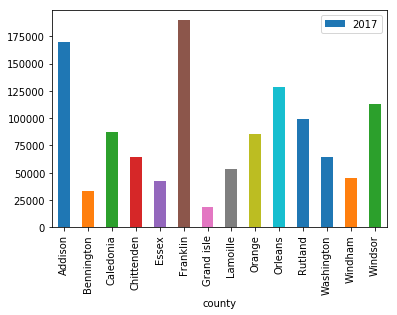

In [11]:
farms[['county', '2017']].plot.bar(x='county', y='2017')

In [12]:
viol_2017_county = pd.merge(viol_2017, ws, left_on='VIOLATION.PWSID', \
                            right_on='WATER_SYSTEM.PWSID')
viol_2017_county = viol_2017_county[['VIOLATION.PWSID', 'VIOLATION.CONTAMINANT_CODE', 'WATER_SYSTEM.COUNTIES_SERVED']]
viol_2017_county.head()

,VIOLATION.PWSID,VIOLATION.CONTAMINANT_CODE,WATER_SYSTEM.COUNTIES_SERVED
0,VT0005382,2996,Rutland
1,VT0005382,2992,Rutland
2,VT0005382,2991,Rutland
3,VT0005382,2990,Rutland
4,VT0005382,2989,Rutland


In [13]:
viol_2017_county_contaminant = pd.merge(viol_2017_county, contaminants, \
                            left_on='VIOLATION.CONTAMINANT_CODE', \
                           right_on='CODE')
viol_2017_county_contaminant_subset = viol_2017_county_contaminant[['VIOLATION.PWSID', \
                                     'NAME', \
                                     'WATER_SYSTEM.COUNTIES_SERVED']]
viol_2017_county_contaminant_subset.head()

,VIOLATION.PWSID,NAME,WATER_SYSTEM.COUNTIES_SERVED
0,VT0005382,STYRENE,Rutland
1,VT0005318,STYRENE,Windsor
2,VT0005536,STYRENE,Windham
3,VT0021599,STYRENE,Addison
4,VT0005049,STYRENE,Caledonia


In [14]:
'''
Farm runoff: herbicides, etc
'''
# farm_contaminants = pd.Series(['Alachlor', 'Atrazine', 'Carbofuran', '2,4-D', 'Dalapon', \
#                      '1,2-Dibromo-3- chloropropane (DBCP)', 'Dinoseb', 'Diquat', \
#                      'Endothall', 'Glyphosate', 'Lindane', 'Methoxychlor', 'Nitrate', \
#                      'Nitrite', 'Oxamyl (Vydate)', 'Picloram', 'Simazine', 'Toxaphene', '2,4,5-TP (Silvex)'])
farm_contaminants = pd.Series(['ALACHLOR ESA', 'Atrazine', 'Carbofuran', '2,4-D', 'Dalapon', \
                     '1,2-Dibromo-3-chloropropane', 'Dinoseb', 'Diquat', \
                     'Endothall', 'Glyphosate', 'Lindane', 'Methoxychlor', 'Nitrate', \
                     'Nitrite', 'Oxamyl', 'Picloram', 'Simazine', 'Toxaphene', '2,4,5-TP'])
farm_contaminants = farm_contaminants.str.upper()
#contaminants[contaminants['NAME'].isin(farm_contaminants)] # haven't found lindane

viol_2017_county_contaminant_subset = viol_2017_county_contaminant_subset[\
    viol_2017_county_contaminant_subset['NAME'].isin(farm_contaminants)]

## Possible farm-related contaminant violations by county

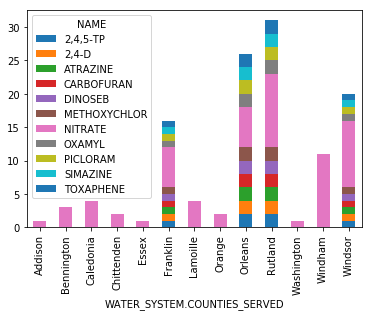

In [15]:
viol_2017_county_contaminant_subset.groupby(['WATER_SYSTEM.COUNTIES_SERVED', 'NAME'])\
    .size().unstack().plot.bar(stacked=True)